# Laminar Flow of a Newtonian Fluid in a Horizontal Pipe
Code author: Dr. Robert Hesketh, hesketh@rowan.edu
## Shooting Method for 2-point Boundary Value Problem (Revised)
Source: Problem 8.1 from Problem Solving in Chemical and Biochemical Engineering with POLYMATH, Excel, and MATLAB (2nd Edition), Publisher: Prentice Hall PTR; (September 22, 2007) ISBN-10: 0131482041 or ISBN-13: 978-0131482043, by Michael B. Cutlip and Mordechai Shacham.

# Chemical Engineering Summer School Workshop Objectives
- Make a copy of this template 
- modify this template to solve this problem with with a linear temperature profile in which the pipe wall is at 45°C and the centerline $(r=0)$ is at 25°C.  You can use the following correlations for density and viscosity of water:  $$\rho=46.048+9.418T-0.0329T^2+4.882\times10^{-5}T^3-2.895\times10^{-8}T^4[=]\frac{kg}{m^3}$$ $$\mu=\exp(-10.547+541.67\,K/(T-144.58\,K))\frac{kg}{m\,s}$$  with $T$ in Kelvin   with $T$ in Kelvin
- Discuss the difficulties that you had in modifying this template.

## Objectives
 - Derive a momentum balance for laminar flow in a pipe
 - Numerically integrate a 2nd order ODE by splitting it into two first order ODE's and using a trial and error technique to obtain a solution.
 - Use the automated iterations (while loop in the code) to perform the trial and error techique used above.  


For C&S 8.1 Use a $\frac{\Delta P}{L}=5 \frac{Pa}{m}$ This will result in a Reynolds number of about 1000 (instead of the turbulent flow value obtained from the text problem)

## Cutlip & Shacham 8.1 Laminar Pipe Flow Modified (remember to Read de Nevers 6.3 and Geankoplis 4.4B)<br>
<ol>
a)   Derive the unsteady-state momentum balance for pipe flow<br>
b)   Derive the analytical solution giving the velocity and stress profiles<br>
c)   Derive the analytical solution for flowrate (remember to Read de Nevers 6.3)<br>
d)   Obtain velocity and stress profiles from a numerical solution of the momentum balance for laminar pipe flow.  (also given below as equations 7 and 8)     <br> 

*   This needs to be solved using a trial and error procedure to find the solution.
*   It is recommended that you obtain an estimated first and second value of velocity at the centerline and then interpolate for each additional trial.  
*   Give a table showing all of your iterations.
*  For the properties of water at 25°C use $\mu=8.937\times10^{-4}$ kg/m/s, $\rho=1000kg/m^3$.  Again for the pressure drop use $\frac{\Delta P}{L}=5 \frac{Pa}{m}$  The radius of the pipe is $R=0.009295 m$. 



e)    Add a section of code that will perform the trial and error processes to obtain the solution.  It is suggested that you use a while loop for this.<br>
f)    Solve Cutlip & Shacham 8.1 modified using COMSOL Multiphysics.  Compare the analytical solution from  above with the solutions obtained from python and COMSOL. This comparison should be done using 2 graphs one for velocity and the other shear stress.  On each graph you should use 3 line styles to distinguish between analytical and numerical solutions of COMSOL and python.  For part c again compare the 3 solutions.  For COMSOL you will need to perform a line integration.<br></ol>

Remember to use $\frac{\Delta P}{L}=5 \frac{Pa}{m}$ The old values are crossed out below with a red line!

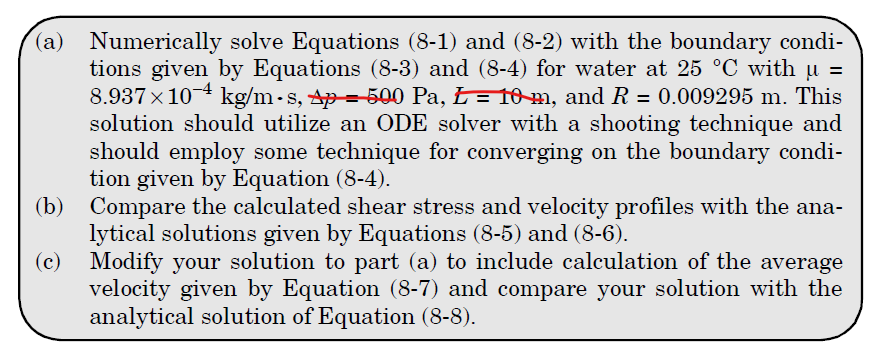

## C&S8.1 Partial Solution (modified from above)
Newtonian fluid flow in a horizontal pipe results in a linear shear stress profile and a parabolic velocity profile.  You will solve this problem using ODE solvers which can only solve first order ODE’s.  Thus you must make the 2nd order ODE into 2 first order ODE’s.  The next problem that you encounter is that you need a boundary condition for each ODE.  But you only have boundary conditions of one variable at the first surface and the second variable at the second surface.  This results in needing a shooting technique to guess the boundary condition of one of the variables and then integrate the equations and check to see if the solution at the second boundary matches the boundary condition that is given.  If not guess a second time and check the boundary conditions.  Then obtain the third guess by interpolation (secant method) or an automated code.  

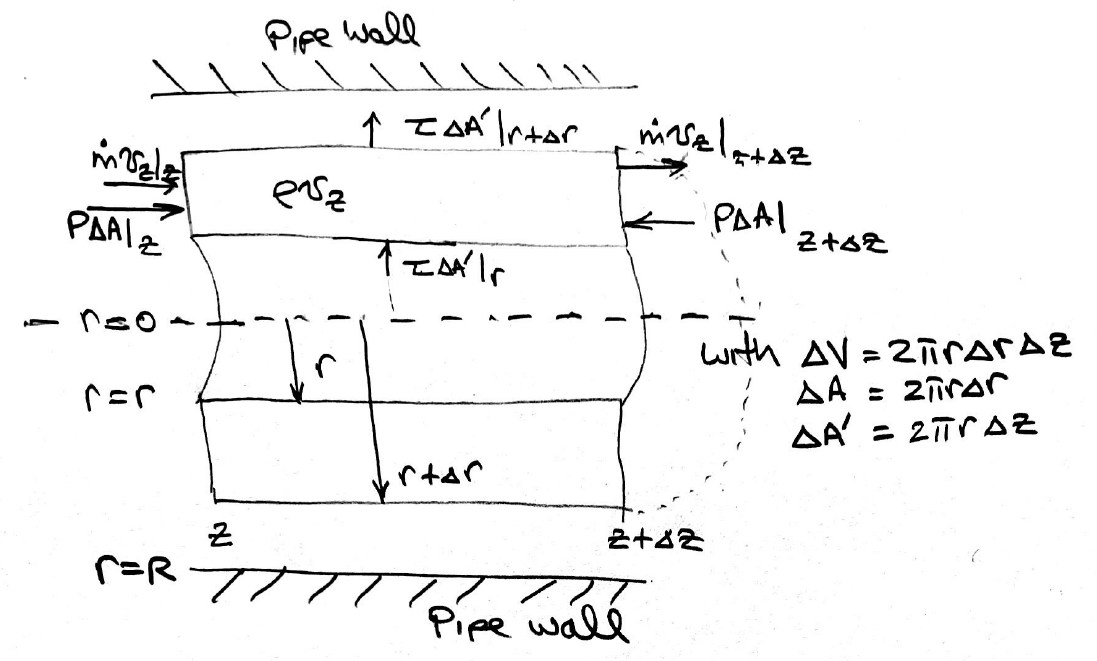

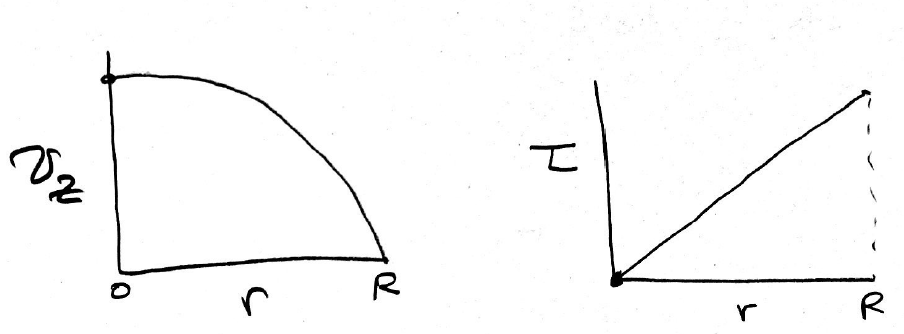



This problem in C&S8.1 which is similar to C&S 6.4 and 6.5. 
The momentum balance on the on a control volume in a pipe of $\Delta V=2\pi r \Delta r \Delta z$:
Differential momentum Balance in z direction
$$\Delta V \frac {(\partial ρ v_z)}{\partial t}= \dot{m} v_z |_{z}-\dot{m} v_z |_{z+\Delta z}+P \Delta A_c|_{z}-P \Delta A_c |_{z+\Delta z} +\tau _{rz} \Delta A_r |_r -\tau _{rz} \Delta A_r |_{r+ \Delta r}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$	
With $\Delta A_c=2\pi\ r\Delta r$ and $\Delta A_r=2\pi\ r \Delta z$ and using the definition of $\dot{m}=\rho\overline{v}A_c$

Dividing by the control volume and taking the limit of $\Delta V →0$:
$$\frac {\partial m v_z}{\partial t}=- \frac{\partial (\rho \overline{v} v_z)}{\partial z} -\frac{\partial P}{\partial z}-\frac{\partial (\tau_{rz}r)}{r\partial r}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(2)$$

At steady state and knowing from experiments that $\frac{dP}{dz}=constant$
$$\frac {\partial m v_z}{\partial t}= 0 = - \frac{\partial (\rho \overline{v} v_z)}{\partial z} -\frac{ dP}{dz}-\frac{\partial (\tau_{rz}r)}{r\partial r}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(3)$$
Evaluating the first term we will use a mass balance on a streamline:
$$\left.\ \ \dot{m}\right|_{in}=\left.\ \ \dot{m}\right|_{out}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(4)$$
Which results in $\rho v_z A = \rho v_z A$ and for a constant density and streamline area the result is that $v_z$ is a constant and the term $\frac{\partial(\rho \overline{v} v_z)}{dz}=0$ and is removed from the equation<br>
The remaining terms are 
$$\frac{\partial (\tau_{rz}r)}{r\partial r}= \left(-\frac{d P}{dz }\right)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(5)$$

The constituitive equation for this geometry is given as
$$\tau_{rz}=-\mu\frac{\partial v_z}{\partial r}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6)$$

We will rearrange the consitutive equation (Eqn 6) into a differential equation:
$$\frac{\partial v_z}{\partial r}=-\frac{\tau_{rz}}{\mu}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$
Equation 5 can be rearranged to give only the derivative on the left hand side
$$\frac{\partial (\tau_{rz}r)}{\partial r}= \left(-\frac{ dP}{ dz}\right)r\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(8)$$
The result is that we can solve the two ode's given by equations 7 and 8 numerically using an ODE solver.

The variable rTAUz will be used instead of the two variables $r\tau_{rz}$
To extract the stress an extra equation is added 
$$\tau_{rz}=\frac{r\tau_{rz}}{r}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(9)$$
This equation will cause problems at $r=0$ so an if then statement is added to handle the start of the integration and prevent division by zero.

Looking at the figures of the velocity and stress profiles given above, the boundary condtions are $ v_z |_{r=0}=max$ and  $ \tau _{rz} |_{r=0}=0$ and
$ v_z |_{r=R}=0$ and  $ \tau _{rz} |_{r=R}= max$ Unfortunately we need to know both values of $v_z$ and $\tau_{rz}$ at ${r=0}$ to start integrating, but we only know $\tau_{rz}=0$ at ${r=0}$. But fortuately we know the value of $v_z$  at ${r=R}$ which is zero! This is called a **split value boundary problem**.  This means we will need to guess the value of $v_z|_{r=0}$ and then check to see that at $ v_z|_{r=R}=0$.


The values of the constants are $R=0.009295\ m \;L=10 m\;\mu=8.937\times{10}^{-4}\frac{kg}{m\ s}\;  \rho=1000 \frac{kg}{m^3}\; \Delta P=50 \frac{Pa}{m}$


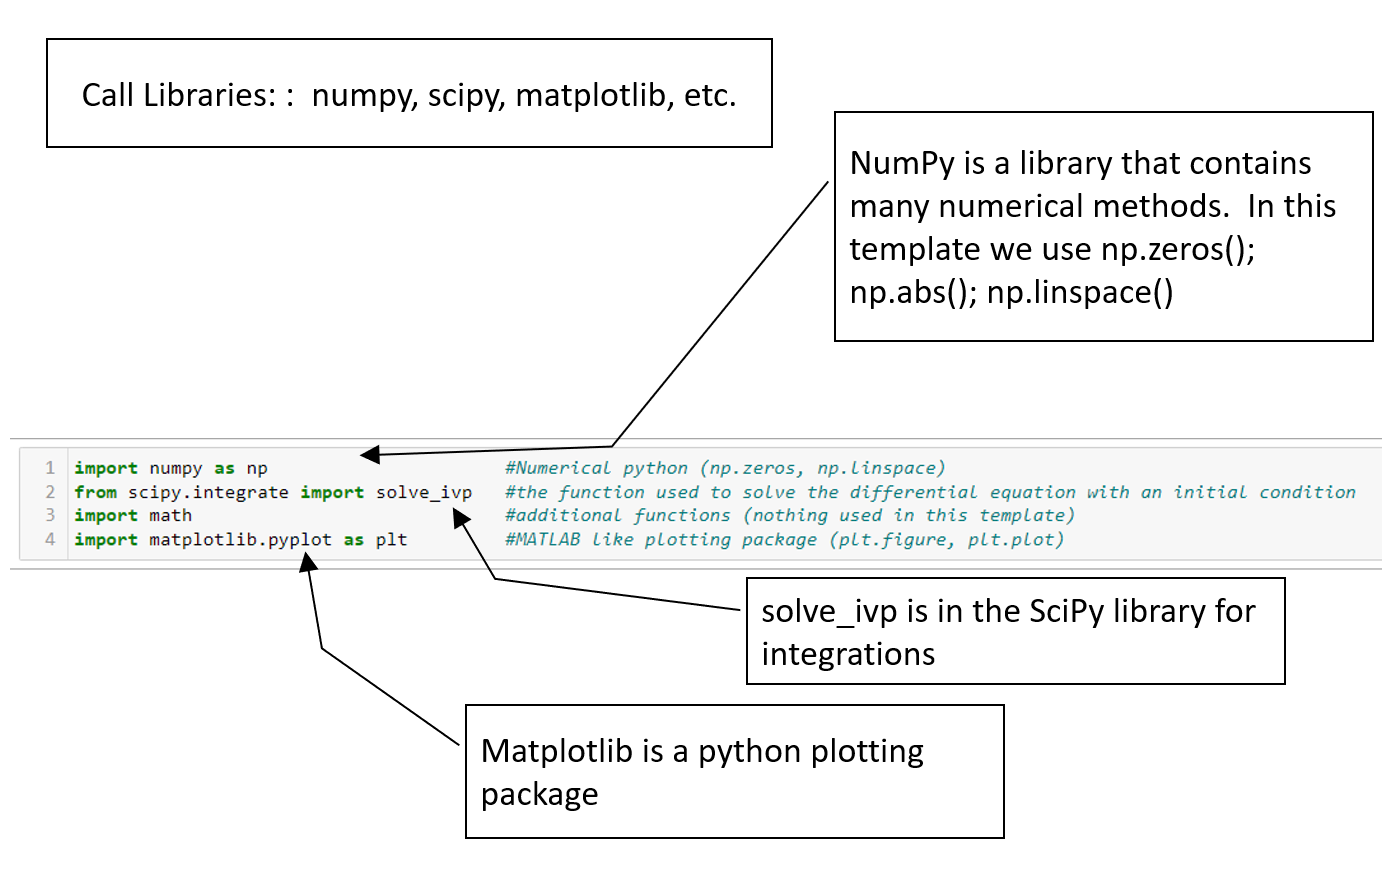

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

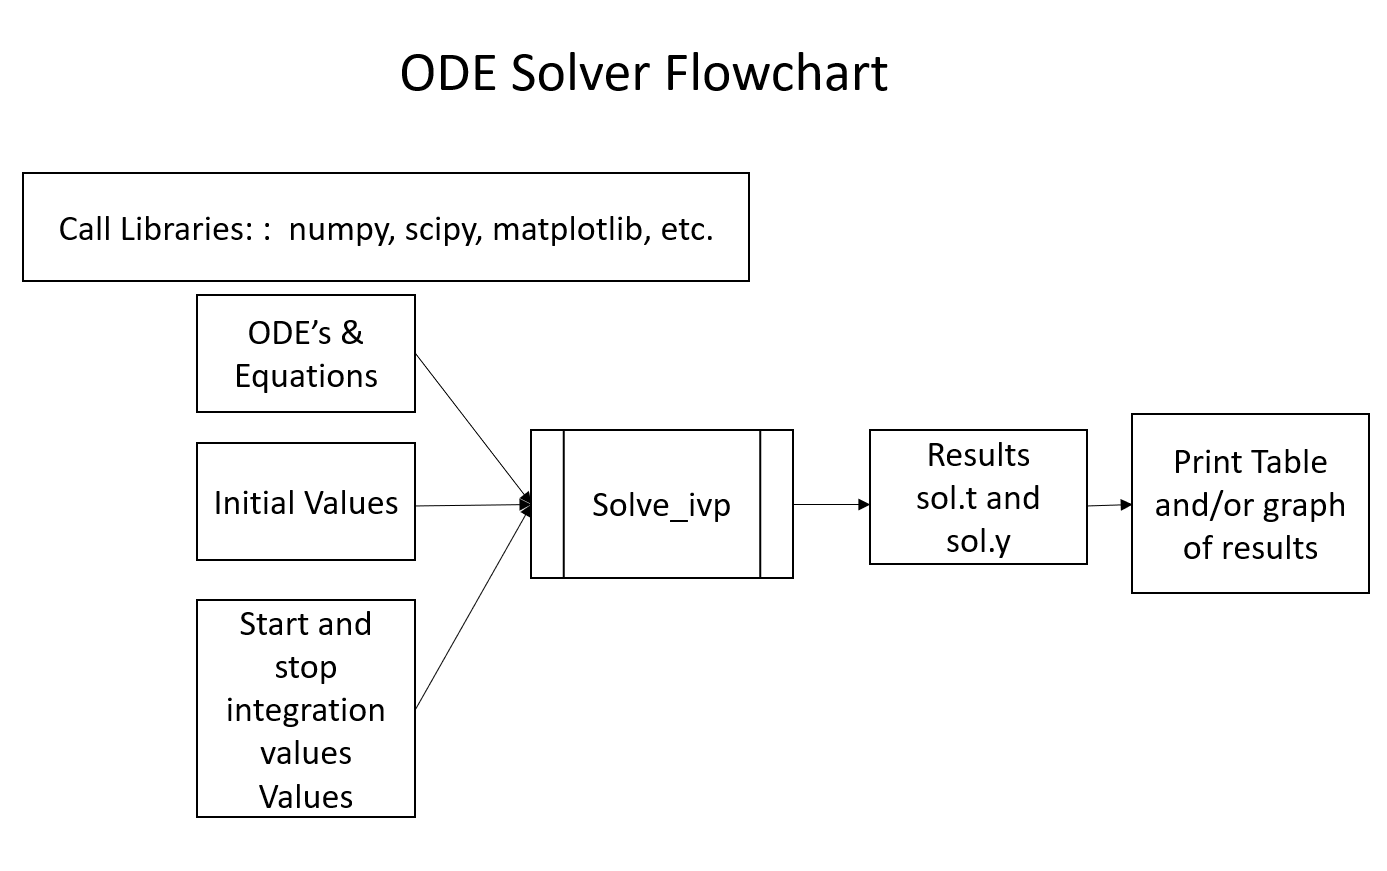

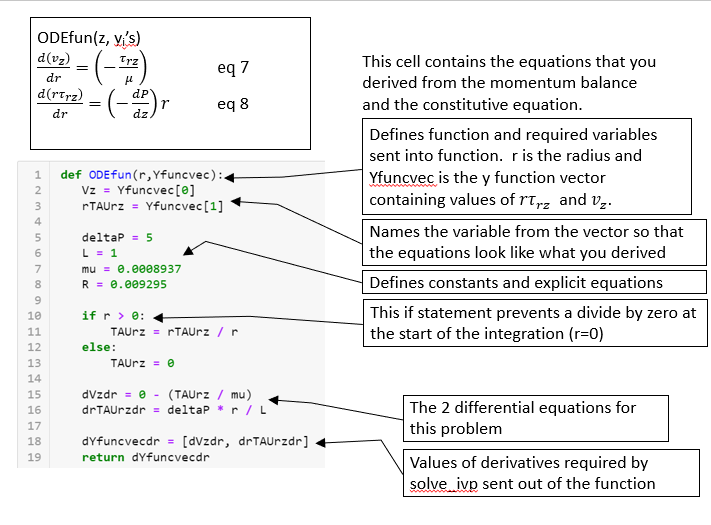![C&SODEfunctionPython.png](attachment:C&SODEfunctionPython.png)

In [ ]:
 def ODEfun(r,Yfuncvec):
    Vz = Yfuncvec[0] 
    rTAUrz = Yfuncvec[1] 
 
    deltaP = 5 
    L = 1 
    mu = 0.0008937 
    R = 0.009295 
    
    if r > 0:
        TAUrz = rTAUrz / r
    else:
        TAUrz = 0
       
    dVzdr = 0 - (TAUrz / mu) 
    drTAUrzdr = deltaP * r / L 
 
    dYfuncvecdr = [dVzdr, drTAUrzdr] 
    return dYfuncvecdr

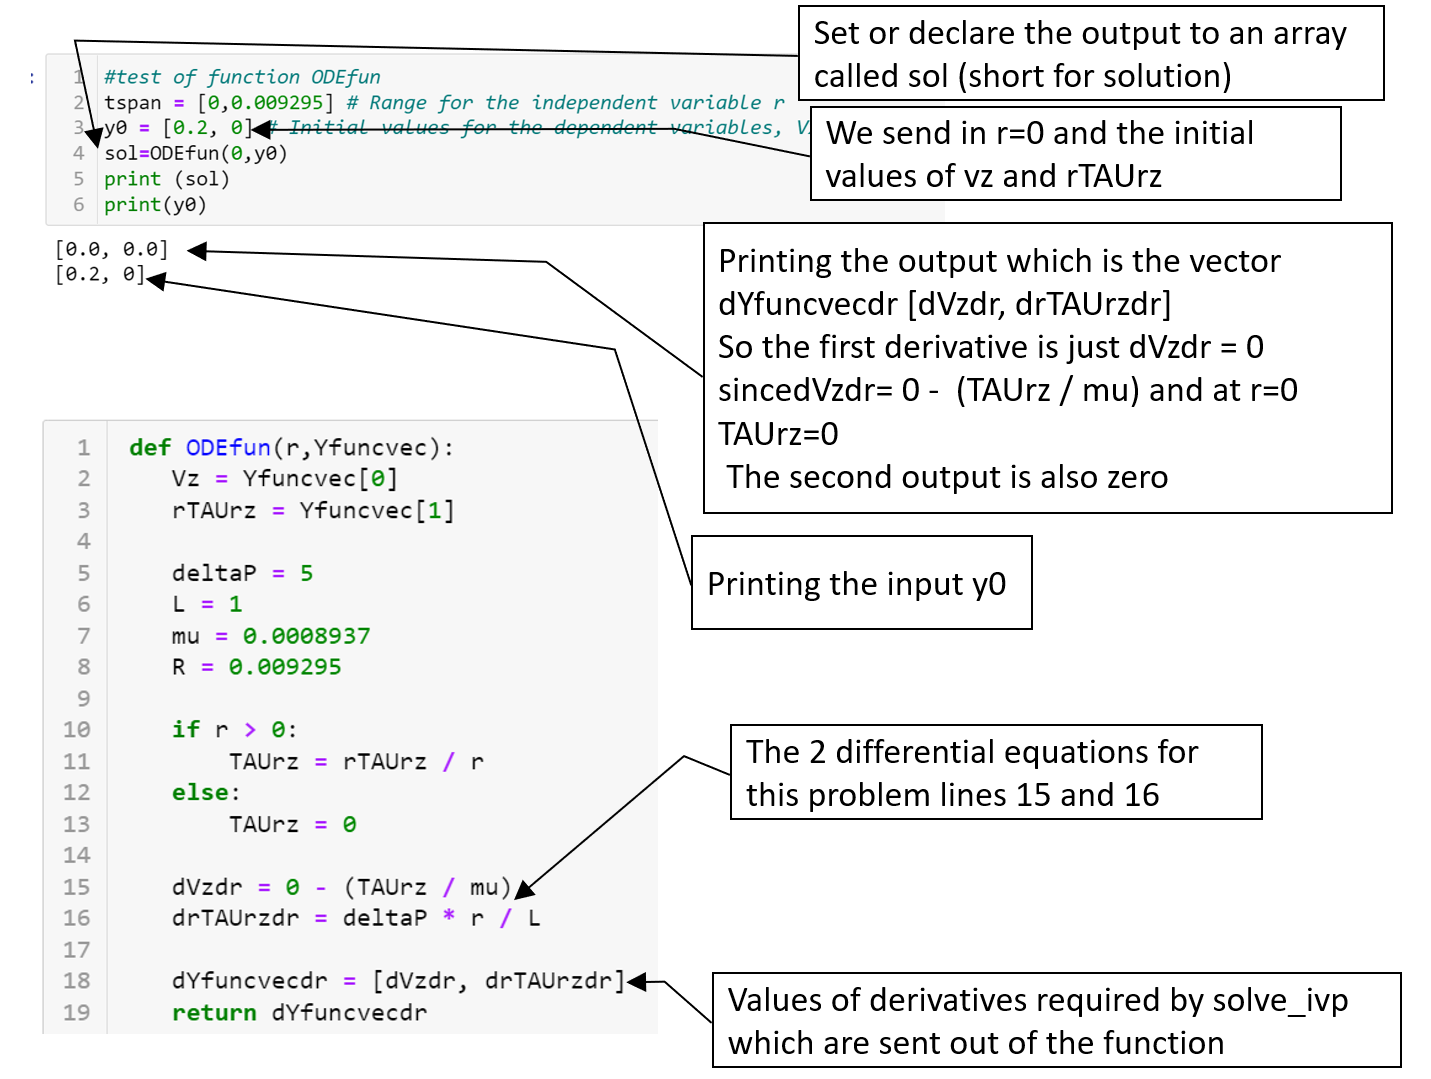

In [ ]:
#test of function ODEfun 
tspan = [0,0.009295] # Range for the independent variable r 
y0 = [0.2, 0] # Initial values for the dependent variables, Vx, rTAUrx
sol=ODEfun(0,y0)
print (sol)
print(y0)

[0.0, 0.0]
[0.2, 0]


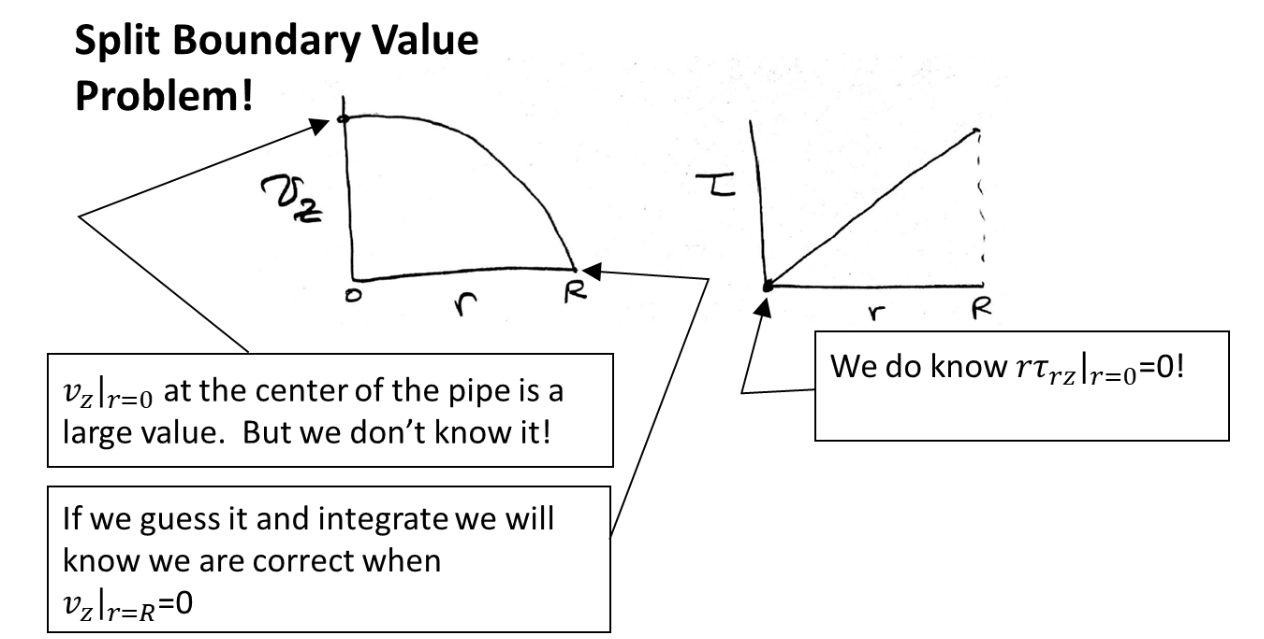


Estimation of the first guess of the velocity at r=0 can be made from the first integration of  $$\frac{\partial v_z}{\partial r}=-\frac{\tau_{rz}}{\mu}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$
Which gives $${\tau_{rz}}=\frac{R}{2}\frac{\Delta P}{L}=\frac{0.009295 m}{2}5=0.02324 Pa\;$$
and for an approximation using $$\frac{dv_z}{dr}≈\frac{\Delta v_z}{\Delta r}=\frac{\tau_{rz}}{\mu}$$
Then $v_{max}$
$$v_{max}=\frac{0.2324\,Pa}{8.937\times{10}^{-4}\frac{kg}{m\ s}}0.009295\,m=0.242\,m/s$$
And then use as the second guess 0.3 m/s.


In [ ]:
approxTau=0.009295/2*5
approxVmax=approxTau/8.937e-4*0.009295
print(approxVmax)

0.2416835207564059


In [ ]:
#Solve this twice
tspan = [0,0.009295] # Range for the independent variable 
print('   Trial    Vz|r=0       Vz|r=wall')
y0 = [approxVmax, 0] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}       {:6.4e}'.format(1, y0[0], sol.y[0,-1]))
y0 = [0.3, 0] # Initial values for the dependent variables
sol2=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}      {:6.4e}'.format(2, y0[0], sol2.y[0,-1]))



   Trial    y0       Vzfinal
   1   0.24168       1.2084e-01
   2   0.30000      1.7916e-01


So have a go at this and see how many guesses it would take to get a velocity at the wall less than 1e-6.  Use the cells below to do these calculations.


## Smart Guessing or iterations
Hopefully you have seen that just guessing the velocity at $r=0$ results in a large number of iterations.  But we are smarter than that!  Your third guess should have been from an interpolation of the first 2 trials.  
Let's interpolate.  Solve for the $v_z|_{r=0}$ that gives $v_z|_{r=\text{Wall}}=0$ using the 2 points above as the slope.
$$\frac{0.3-0.24168}{0.17916-0.12084}=\frac{0024168-NEXTv_z}{0.12084-0}$$
solving for $\text{NEXT}v_z$
$$\text{NEXT}v_z=\frac{0.3-0.24168}{0.17916-0.12084}{(0-0.17916)}+0.3$$
gives our 3rd guess.

In [ ]:
NEXTvz=(0.3-0.24168)/(0.17916-0.12084)*(0-0.17916)+0.3
print(NEXTvz)

0.12084000000000006


In [ ]:
#Solve this 3 times
tspan = [0,0.009295] # Range for the independent variable 
print('   Trial    y0       Vzfinal')
y0 = [approxVmax, 0] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}       {:6.4e}'.format(1, y0[0], sol.y[0,-1]))
y0 = [0.3, 0] # Initial values for the dependent variables
sol2=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}      {:6.4e}'.format(2, y0[0], sol2.y[0,-1]))
y0 = [NEXTvz, 0] # Initial values for the dependent variables
sol3=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}      {:6.4e}'.format(3, y0[0], sol3.y[0,-1]))


   Trial    y0       Vzfinal
   1   0.24168       1.2084e-01
   2   0.30000      1.7916e-01
   2   0.12084      -1.7604e-06


Looking at the above table, to get below 1E-6 we would need another trial.  But if we had used the default precision of python instead of rounding the numbers we would be finished.  See the calculation below.

In [ ]:
#if we had used all the digits
NEXTvz=(0.3-approxVmax)/(sol2.y[0,-1]-sol.y[0,-1])*(0-sol2.y[0,-1])+0.3
print(NEXTvz)

0.12084176037820296


In [ ]:
#Solve this 3 times but using default precision
tspan = [0,0.009295] # Range for the independent variable 
print('   Trial    y0       Vzfinal')
y0 = [approxVmax, 0] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}       {:6.4e}'.format(1, y0[0], sol.y[0,-1]))
y0 = [0.3, 0] # Initial values for the dependent variables
sol2=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}      {:6.4e}'.format(2, y0[0], sol2.y[0,-1]))
y0 = [NEXTvz, 0] # Initial values for the dependent variables
sol3=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print('   {:d}  {:8.5f}      {:6.4e}'.format(3, y0[0], sol3.y[0,-1]))

   Trial    y0       Vzfinal
   1   0.24168       1.2084e-01
   2   0.30000      1.7916e-01
   3   0.12084      1.3878e-17


## Automated Calculation of the trials
Why do this by hand?  We are sitting at a computer.  Why not tell the computer to do this work!

Automating the interpolation process is called the secant method. Using our first 2 guesses of the value of $ v_z |_{r=0}$ we will calculate the $v_z$ at the wall.  The velocity at the wall should be zero.  In many cases the value that we looking for is not zero and then you will need to subtract it from the value to still look for zero.  We will call this the error or err.  So this looks silly since we are looking for zero so we are subtracing zero! 
$$err(v_{z_{k}})=\left. v_z \right|_{r=R}-0$$ 
Again the <b>secant method </b>is just a <b>linear interpolation between pairs of points </b>.  
In this case the pairs of points are the $( v_z |_{r=0}$,$ v_z |_{r=R}$) or $(y_0, err( y_0 ))$

$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})$$
$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})\frac{ y_{0_k}-y_{0_{k-1}} } {err(y_{0_k})-err(y_{0_{k-1}})}$$
Two initial values or guesses of y_0 are needed.

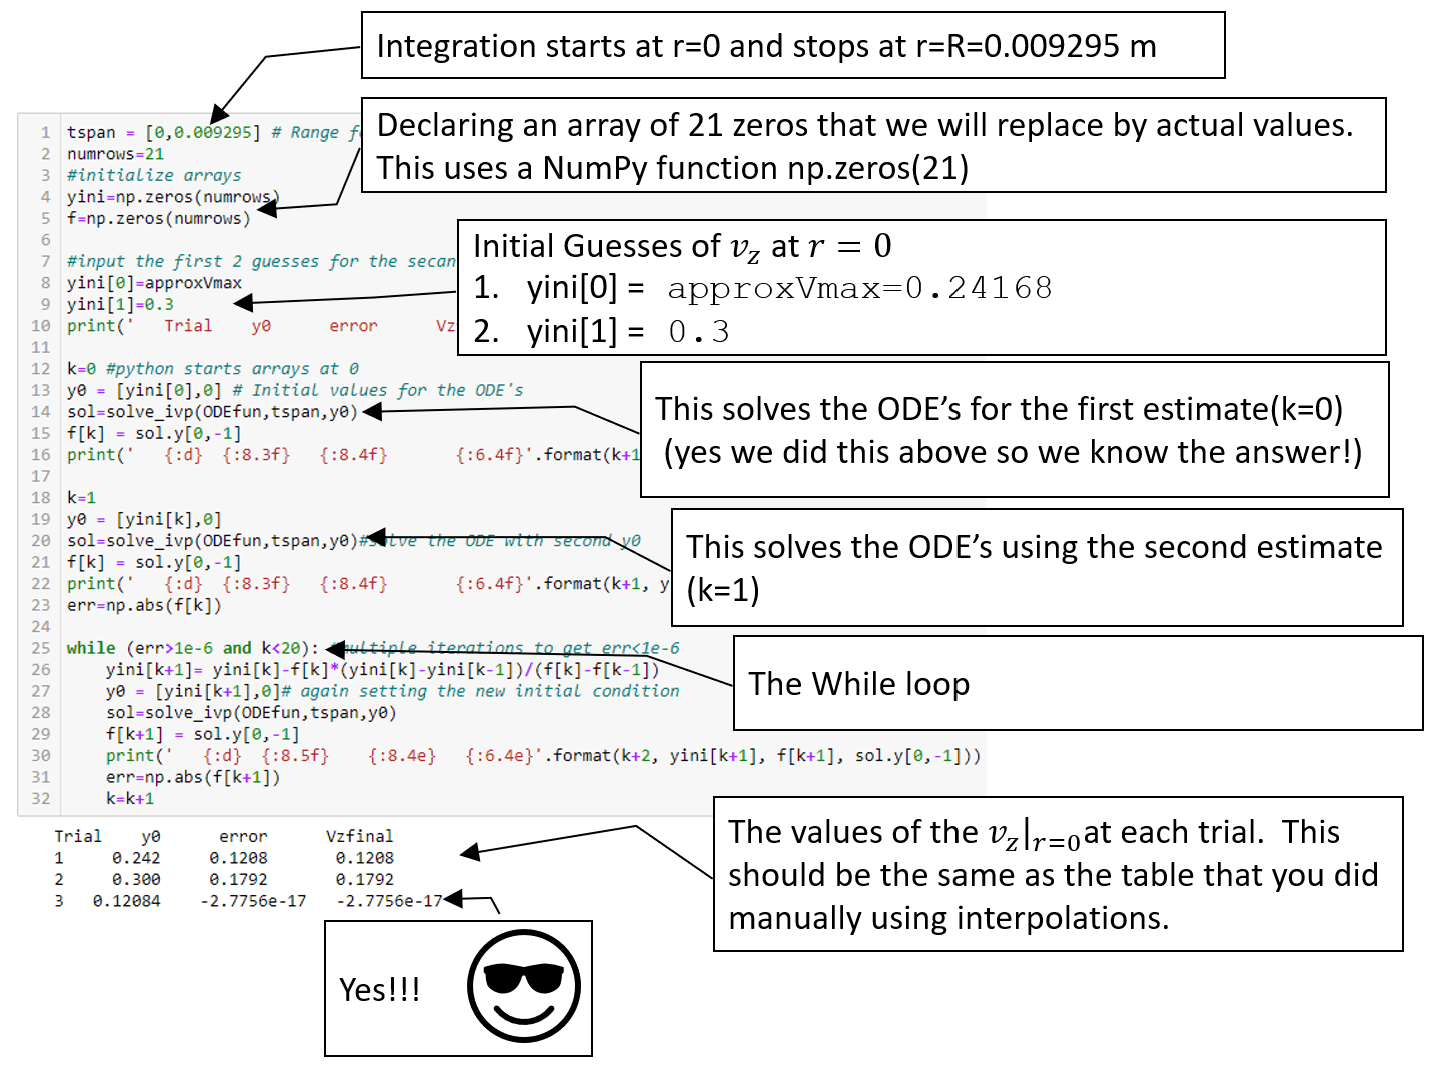

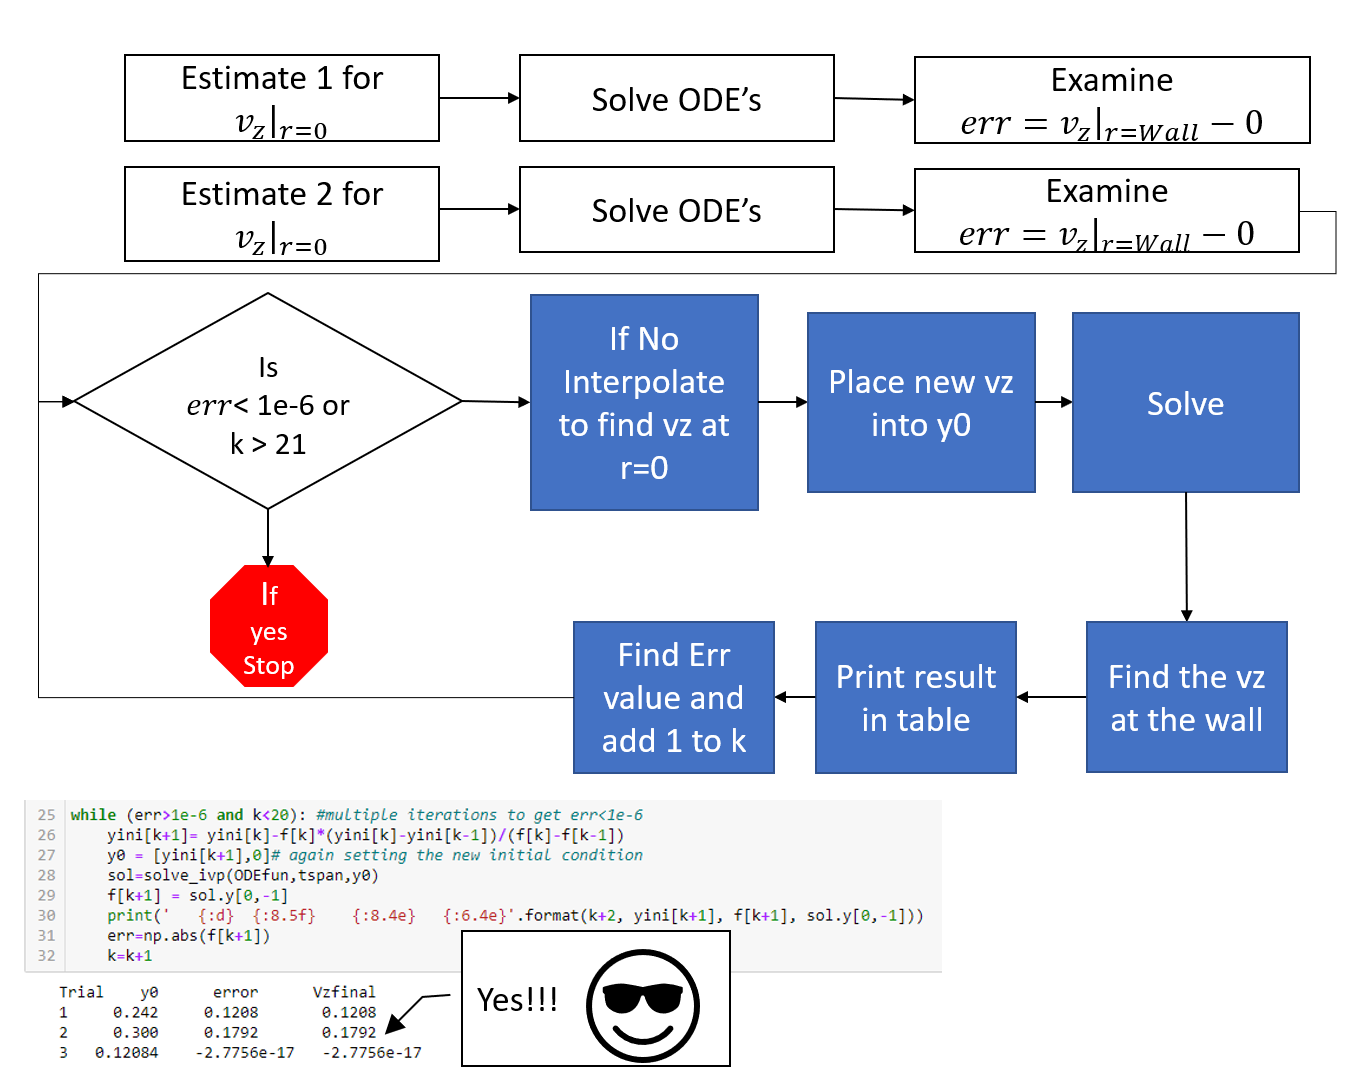

In [ ]:
tspan = [0,0.009295] # Range for the independent variable 

#initialize arrays
yini=np.zeros(21)
f=np.zeros(21)

#input the first 2 guesses for the secant method
yini[0]=approxVmax
yini[1]=0.3
print('   Trial    y0      error      Vzfinal')

k=0 #python starts arrays at 0
y0 = [yini[0],0] # Initial values for the ODE's
sol=solve_ivp(ODEfun,tspan,y0)
f[k] = sol.y[0,-1] 
print('   {:d}  {:8.3f}   {:8.4f}       {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))

k=1
y0 = [yini[k],0]
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE with second y0
f[k] = sol.y[0,-1]
print('   {:d}  {:8.3f}   {:8.4f}       {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))
err=np.abs(f[k])

while (err>1e-6 and k<20): #multiple iterations to get err<1e-6
    yini[k+1]= yini[k]-f[k]*(yini[k]-yini[k-1])/(f[k]-f[k-1])
    y0 = [yini[k+1],0]# again setting the new initial condition
    sol=solve_ivp(ODEfun,tspan,y0)
    f[k+1] = sol.y[0,-1]
    print('   {:d}  {:8.5f}    {:8.4e}   {:6.4e}'.format(k+2, yini[k+1], f[k+1], sol.y[0,-1]))
    err=np.abs(f[k+1])
    k=k+1

   Trial    y0      error      Vxfinal
   1     0.242     0.1208       0.1208
   2     0.300     0.1792       0.1792
   3   0.12084    4.1633e-17   4.1633e-17


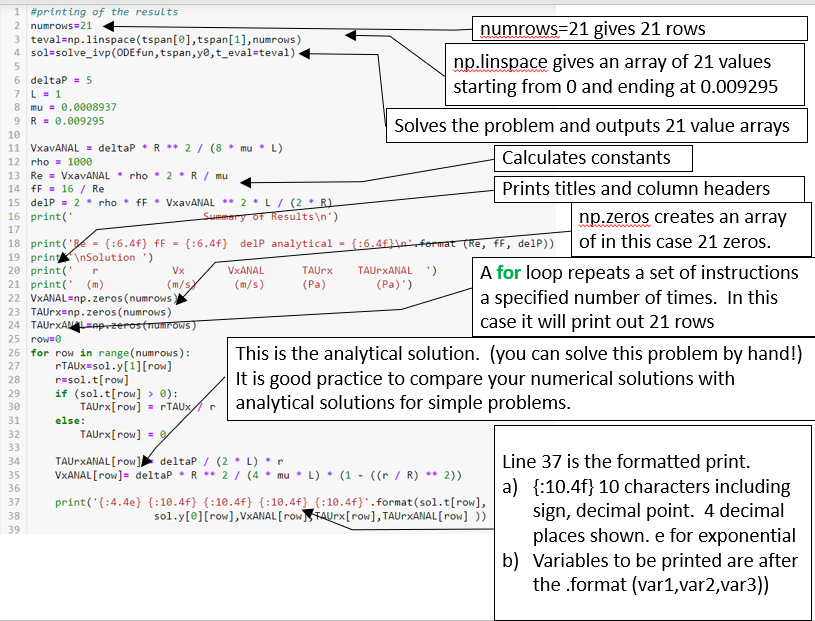

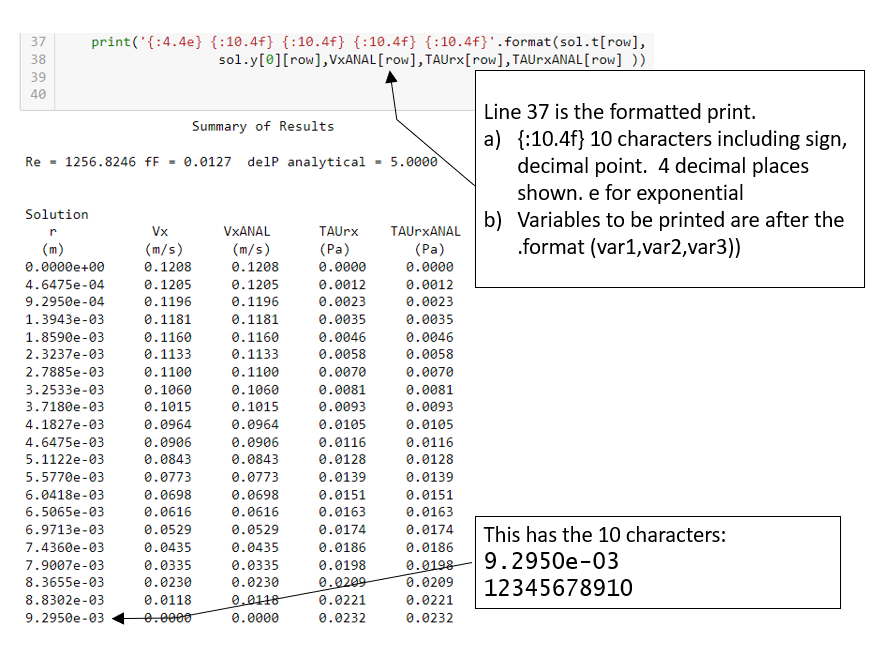

In [ ]:
#printing of the results
numrows=21
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)

deltaP = 5
L = 1 
mu = 0.0008937 
R = 0.009295 

VxavANAL = deltaP * R ** 2 / (8 * mu * L)
rho = 1000
Re = VxavANAL * rho * 2 * R / mu 
fF = 16 / Re 
delP = 2 * rho * fF * VxavANAL ** 2 * L / (2 * R)
print('                     Summary of Results\n')

print('Re = {:6.4f} fF = {:6.4f}  delP analytical = {:6.4f}\n'.format (Re, fF, delP))
print('\nSolution ')
print('   r            Vx       VxANAL      TAUrx    TAUrxANAL  ')
print('  (m)          (m/s)      (m/s)      (Pa)        (Pa)')
VxANAL=np.zeros(numrows)
TAUrx=np.zeros(numrows)
TAUrxANAL=np.zeros(numrows)
row=0
for row in range(numrows):
    rTAUx=sol.y[1][row]
    r=sol.t[row]
    if (sol.t[row] > 0): 
        TAUrx[row] = rTAUx / r
    else:
        TAUrx[row] = 0
   
    TAUrxANAL[row] = deltaP / (2 * L) * r 
    VxANAL[row]= deltaP * R ** 2 / (4 * mu * L) * (1 - ((r / R) ** 2))
   
    print('{:4.4e} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'.format(sol.t[row],
                    sol.y[0][row],VxANAL[row],TAUrx[row],TAUrxANAL[row] ))



                     Summary of Results

Re = 1256.8246 fF = 0.0127  delP analytical = 5.0000


Solution 
   r            Vx       VxANAL      TAUrx    TAUrxANAL  
  (m)          (m/s)      (m/s)      (Pa)        (Pa)
0.0000e+00     0.1208     0.1208     0.0000     0.0000
4.6475e-04     0.1205     0.1205     0.0012     0.0012
9.2950e-04     0.1196     0.1196     0.0023     0.0023
1.3943e-03     0.1181     0.1181     0.0035     0.0035
1.8590e-03     0.1160     0.1160     0.0046     0.0046
2.3237e-03     0.1133     0.1133     0.0058     0.0058
2.7885e-03     0.1100     0.1100     0.0070     0.0070
3.2533e-03     0.1060     0.1060     0.0081     0.0081
3.7180e-03     0.1015     0.1015     0.0093     0.0093
4.1827e-03     0.0964     0.0964     0.0105     0.0105
4.6475e-03     0.0906     0.0906     0.0116     0.0116
5.1122e-03     0.0843     0.0843     0.0128     0.0128
5.5770e-03     0.0773     0.0773     0.0139     0.0139
6.0418e-03     0.0698     0.0698     0.0151     0.0151
6.5065e-03  

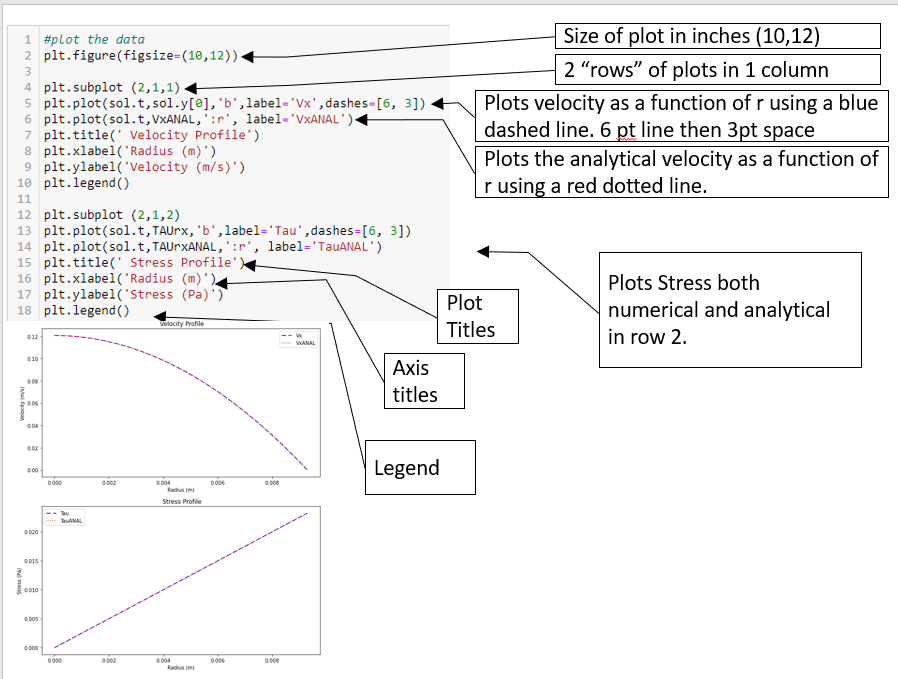

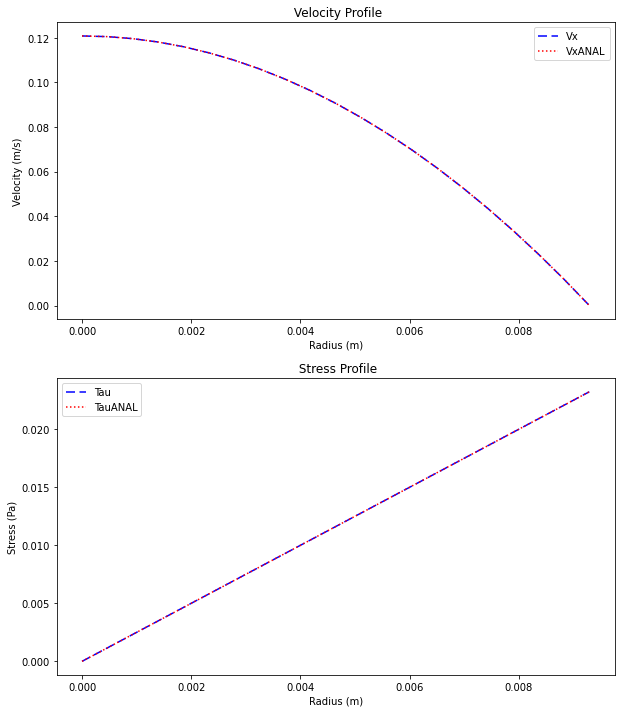

In [ ]:
#plot the data

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='Vx',dashes=[6, 3])
plt.plot(sol.t,VxANAL,':r', label='VxANAL')
plt.title(' Velocity Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot (2,1,2)
plt.plot(sol.t,TAUrx,'b',label='Tau',dashes=[6, 3])
plt.plot(sol.t,TAUrxANAL,':r', label='TauANAL')
plt.title(' Stress Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Stress (Pa)')
plt.legend()


Solve for the stress and velocity profiles assuming that there is a linear temperature profile within the fluid. With the temperature at $r=0$ us $T|_{r=0}=25°C$ and at the wall $T|_{r=R}=45°C$  The temperature dependence of viscosity is given by $\mu=exp\left[-10.547+\frac{541.69K}{(T-144.53K)}\right]\frac{kg}{m\,s}$